In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from multinomial import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [30]:
raw_train_data = "../data/train.csv"
raw_test_data = "../data/test.csv"

In [26]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

# cols = [
#     "lat",
#     "Z1000",
#     "Z200",
#     "TMQ",
#     "PSL",
#     "U850",
#     "VBOT",
#     "TS",
#     "QREFHT",
#     "UBOT",
#     "time",
# ]

# raw_data = raw_data[cols + ["Label"]]

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_data, test_size=0.33#, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')


# Wrapper method

In [ ]:
# Create and train the model.
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=2000, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

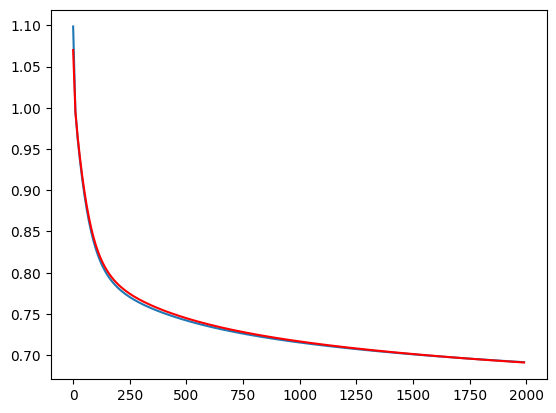

In [ ]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

In [ ]:
# Create and train the model.
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=200, regularizer=0)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8288327220317376
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9114  887 1720]
 [ 212  361    5]
 [ 711   91 1670]] 

Accuracy:
0.7545 

Precision:
0.5565 

Recall:
0.6926 

F1 Score:
0.6171


## Adding reg

In [42]:
# Create and train the model.
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.1)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8591674717485175
Epoch 200, cross entropy loss: 0.829069233524812
Epoch 300, cross entropy loss: 0.8236590938779967
Epoch 400, cross entropy loss: 0.8235379655877284
Epoch 500, cross entropy loss: 0.8255456166922973
Epoch 600, cross entropy loss: 0.8288924549424719
Epoch 700, cross entropy loss: 0.8332243816922598
Epoch 800, cross entropy loss: 0.8383185495499988
Epoch 900, cross entropy loss: 0.8440200572358992
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9924  551 1246]
 [ 277  300    1]
 [ 894   66 1512]] 

Accuracy:
0.7945 

Precision:
0.5899 

Recall:
0.6591 

F1 Score:
0.6226


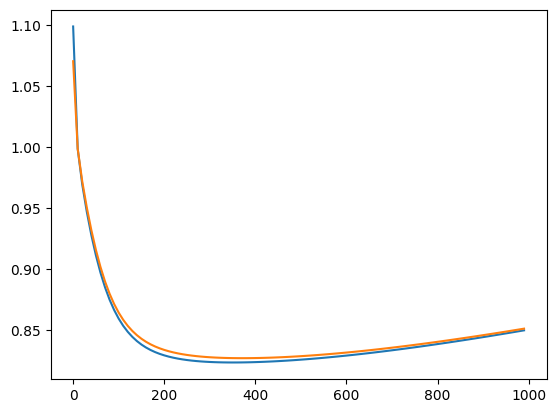

In [43]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors
)

In [52]:
model.iters[np.argmin(model.valid_errors)]

980

In [45]:
# Create and train the model.
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8318661970034156
Epoch 200, cross entropy loss: 0.7858613759796478
Epoch 300, cross entropy loss: 0.7687259475882917
Epoch 400, cross entropy loss: 0.7582185013339766
Epoch 500, cross entropy loss: 0.7503938550379979
Epoch 600, cross entropy loss: 0.7442148076600898
Epoch 700, cross entropy loss: 0.7392198357135547
Epoch 800, cross entropy loss: 0.7351194486074474
Epoch 900, cross entropy loss: 0.7317086739687486
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9924  551 1246]
 [ 277  300    1]
 [ 894   66 1512]] 

Accuracy:
0.7945 

Precision:
0.5899 

Recall:
0.6591 

F1 Score:
0.6226


In [46]:
np.min(model.valid_errors)

0.7303972961328655

In [47]:
model.iters[np.argmin(model.valid_errors)]

990

In [48]:
# Create and train the model.
model = MultinomialLogisticRegression(
    learning_rate=0.1, 
    num_iterations=model.iters[np.argmin(model.valid_errors)], 
    regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.8318661970034156
Epoch 200, cross entropy loss: 0.7858613759796478
Epoch 300, cross entropy loss: 0.7687259475882917
Epoch 400, cross entropy loss: 0.7582185013339766
Epoch 500, cross entropy loss: 0.7503938550379979
Epoch 600, cross entropy loss: 0.7442148076600898
Epoch 700, cross entropy loss: 0.7392198357135547
Epoch 800, cross entropy loss: 0.7351194486074474
Epoch 900, cross entropy loss: 0.7317086739687486
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[9915  556 1250]
 [ 277  300    1]
 [ 889   66 1517]] 

Accuracy:
0.7943 

Precision:
0.5894 

Recall:
0.6595 

F1 Score:
0.6225


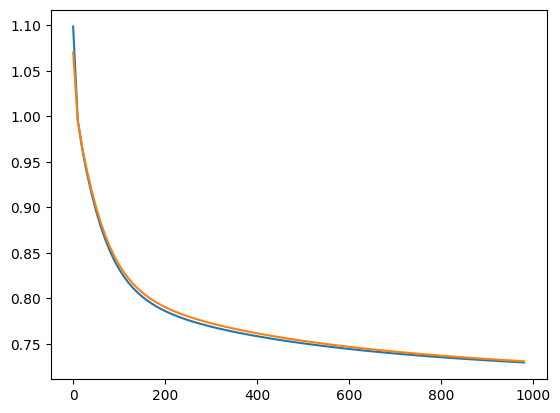

In [49]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors
)

In [50]:
# test
preproc = Preprocess()
raw_data = preproc.load_data(raw_test_data)
# raw_data = raw_data[cols + ["SNo"]]

test_df, test_data = preproc.preprocess_data(
    raw_data, drop_cols=["SNo", "time"], is_test=True
)

print(test_df.columns)

test_data = preproc.normalize_data(test_data)
y_pred_test = model.predict(test_data)

submition = raw_data["SNo"].reset_index().copy()
submition["Label"] = pd.Series(y_pred_test)
submition.drop("index", axis=1, inplace=True)
submition.to_csv(f"predictions_{datetime.now()}.csv", index=False)


Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'month'],
      dtype='object')


In [51]:
import numpy as np
all_combs = np.array(np.meshgrid([1,2,3], [4, 5])).T.reshape(-1, 2)